name      = 09-14_edited.txt
x         = Float64[1795]
y         = Float64[1795]
staterror = None
syserror  = None
y-mean:
5.203253808074407e-16
y range:
5.827965989457039e-15


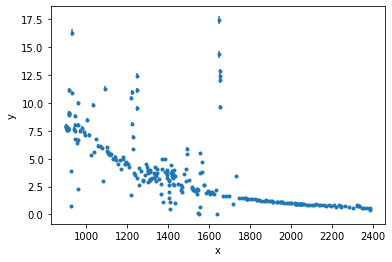

In [18]:
%matplotlib inline
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import sherpa.ui as ui
from astropy.io import fits

#Data using sherpa
ui.load_data('09-14_edited.txt')
print(ui.get_data())
x = ui.get_data().x
y = ui.get_data().y

#plotting with sherpa
ui.load_arrays(1, x, y)
print('y-mean:')
print(ui.get_data().y.mean())
print('y range:')
print(np.ptp(ui.get_data().y))

#rescaling data
d1 = ui.get_data()
d1.y *= 1e16

#setting errors
d1.staterror == None
True
ui.set_staterror(0.02, fractional=True)
d1.staterror == None
False

#filtering data and plotting
ui.notice(900, 2391)
ui.plot_data()

#template model fit
ui.load_template_model("wr_model","templ_models.txt")
ui.set_model(wr_model)

#disabling template interpolator
ui.load_template_model("wr_model", "templ_models.txt", template_interpolator_name=None)

from sherpa.utils import neville, nearest_interp, linear_interp
from sherpa.models import KNNInterpolator

ui.load_template_interpolator("KNN", KNNInterpolator)
ui.load_template_model("wr_model", "templ_models.txt", template_interpolator_name="KNN")



[[112.2   7.9]
 [ 89.1   4. ]
 [ 79.4  50. ]
 [ 63.1   5. ]
 [ 63.1  32. ]
 [ 50.1   2. ]]
Dataset               = 1
Method                = gridsearch
Statistic             = chi2
Initial fit statistic = 687500
Final fit statistic   = 687500 at function evaluation 7
Data points           = 275
Degrees of freedom    = 273
Probability [Q-value] = 0
Reduced statistic     = 2518.32
Change in statistic   = 2.32831e-10
   wr_model.temp   50.1        
   wr_model.radius   2           


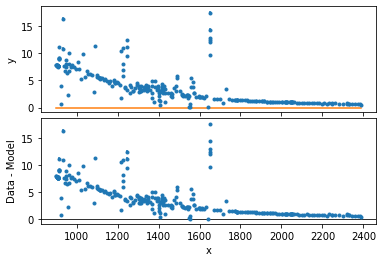

In [19]:
#parameter values
print(wr_model.parvals)

#changing optimization method from levmar to gridsearch
ui.set_method("gridsearch")
ui.set_method_opt('sequence', wr_model.parvals)

#plotting fit
ui.fit()
ui.plot_fit_resid()